In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
# Import data dari CSV
data = pd.read_excel('revisi_dataset_clean.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nik            71 non-null     int64 
 1   nama           71 non-null     object
 2   alamat         71 non-null     object
 3   no_rt          71 non-null     int64 
 4   pekerjaan      71 non-null     int64 
 5   penghasilan    71 non-null     int64 
 6   tanggungan     71 non-null     int64 
 7   kondisi_rumah  71 non-null     int64 
 8   status_rumah   71 non-null     int64 
 9   jenis          71 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 5.7+ KB


,nik,nama,alamat,no_rt,pekerjaan,penghasilan,tanggungan,kondisi_rumah,status_rumah,jenis
0,1571011507470060,A.GANI.M.Z,Jl. Slamet Riyadi Lrg. Skip Ii,23,1,1,1,1,0,0
1,1571011111840160,AAN SUMARNA,Jl. Selamet Riyadi,23,2,2,1,3,0,1
2,1571010708580000,ABDUL KADIR,Jl Mm Ibrahim,24,2,2,1,3,0,1
3,1571010104790060,AFRIYANTO,Jl Mm Ibrahim,24,4,2,1,3,0,1
4,1571011608840180,AGUS SUNARYA,Jl. Soemantri Brojonegoro Rt. 012 Solok Sipin,12,5,2,2,2,1,2


In [9]:
# Memisahkan fitur dan label
X = data.iloc[:, [4,5,6,7,8]].values  # Independent Feature
y = data.iloc[:, -1].values
print(X)
print(y)

[[1 1 1 1 0]
 [2 2 1 3 0]
 [2 2 1 3 0]
 [4 2 1 3 0]
 [5 2 2 2 1]
 [4 2 3 2 0]
 [5 2 2 2 1]
 [3 1 1 1 0]
 [1 1 2 1 1]
 [2 3 1 4 1]
 [1 1 1 1 1]
 [5 2 2 2 0]
 [4 2 2 3 0]
 [2 2 1 2 0]
 [5 2 2 2 1]
 [2 2 1 3 0]
 [2 3 1 4 1]
 [8 2 3 2 1]
 [3 1 2 1 1]
 [2 2 1 3 1]
 [5 3 2 4 1]
 [5 2 2 3 0]
 [2 2 2 3 0]
 [5 2 2 3 0]
 [4 3 2 4 1]
 [4 2 2 3 1]
 [2 2 1 3 1]
 [4 2 2 2 0]
 [5 2 2 3 1]
 [2 2 1 3 0]
 [5 2 2 2 1]
 [2 3 1 4 1]
 [1 1 2 1 1]
 [4 2 2 3 0]
 [1 1 3 1 1]
 [1 1 1 1 1]
 [3 1 2 1 1]
 [2 2 1 2 0]
 [1 1 2 1 1]
 [5 2 2 2 1]
 [4 2 2 3 1]
 [4 2 3 3 0]
 [1 1 1 1 1]
 [1 1 2 1 1]
 [4 3 2 4 0]
 [4 2 2 2 0]
 [4 2 2 3 1]
 [4 2 2 2 1]
 [5 2 2 3 1]
 [3 1 2 1 0]
 [1 1 2 1 0]
 [6 1 1 1 0]
 [5 2 2 3 0]
 [8 2 3 3 1]
 [2 2 1 3 1]
 [4 2 3 3 1]
 [4 2 2 3 0]
 [1 1 2 1 1]
 [3 1 3 1 1]
 [2 2 1 3 1]
 [7 1 1 1 0]
 [5 3 2 4 1]
 [3 2 1 1 0]
 [4 2 2 3 1]
 [5 2 2 3 0]
 [7 1 2 1 1]
 [7 1 1 1 1]
 [2 3 1 4 1]
 [5 3 2 4 1]
 [4 3 2 4 1]
 [4 2 2 3 0]]
[0 1 1 1 2 2 2 0 0 3 0 2 1 2 2 1 3 2 0 1 3 1 1 1 3 1 1 2 1 1 2 3 0 1 0 0 0
 

In [10]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [11]:
# Membuat model Gaussian Naive Bayes
model = GaussianNB()

# Melatih model
model.fit(X_train, y_train)


GaussianNB()

In [12]:
# Memprediksi data pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Menampilkan matriks kebingungan
print("Matriks Kebingungan:\n", confusion_matrix(y_test, y_pred))

# Cross-Validation
# cv_scores = cross_val_score(model, X_selected, y, cv=5)
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores) * 100:.2f}%")

Akurasi: 94.44%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         3

    accuracy                           0.94        18
   macro avg       0.96      0.94      0.95        18
weighted avg       0.95      0.94      0.94        18

Matriks Kebingungan:
 [[5 0 0 0]
 [0 6 0 0]
 [0 1 3 0]
 [0 0 0 3]]
Cross-Validation Scores: [1.         1.         1.         0.92857143 0.64285714]
Mean Cross-Validation Score: 91.43%


<ipython-input-50-f66f60f10fe3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='jenis', palette='viridis')


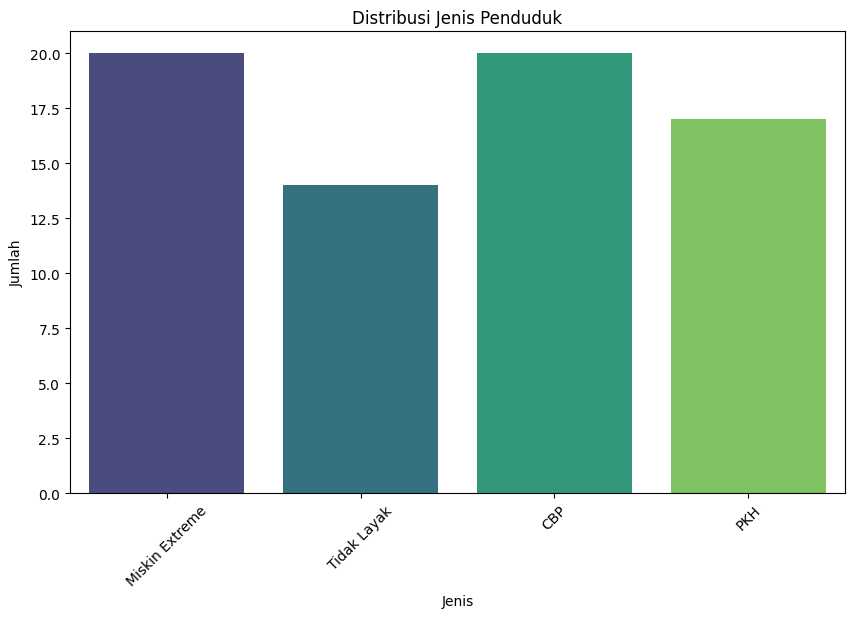

In [ ]:
data['jenis'] = data['jenis'].map({0: 'Miskin Extreme', 1: 'CBP', 2: 'PKH', 3: 'Tidak Layak'})

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='jenis', palette='viridis')
plt.title('Distribusi Jenis Penduduk')
plt.xlabel('Jenis')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

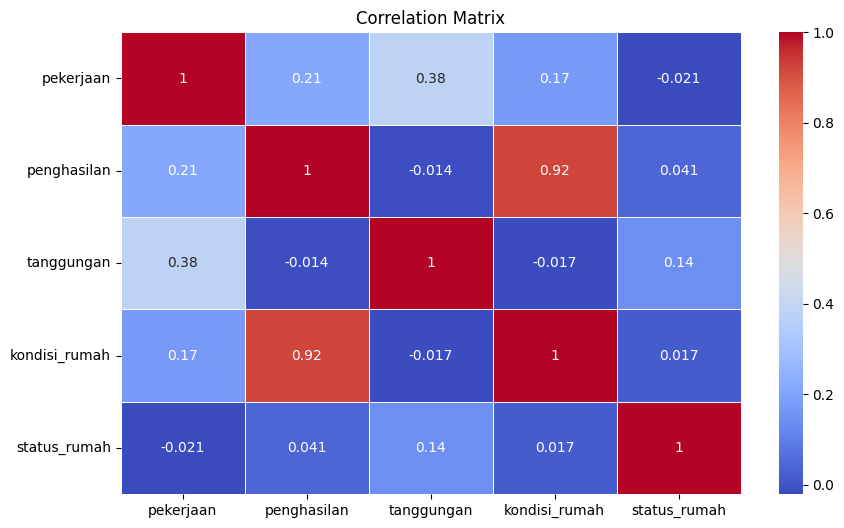

In [ ]:
# Memilih kolom yang akan digunakan untuk heatmap korelasi
columns_for_heatmap = ['pekerjaan', 'penghasilan', 'tanggungan', 'kondisi_rumah', 'status_rumah']

# Memilih subset data yang relevan untuk heatmap
data_heat = data[columns_for_heatmap]

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = data_heat.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Data baru yang ingin diuji
new_data = np.array([[4, 2, 2, 3, 0]])  # Sesuaikan dengan data yang ingin diuji

# Membuat DataFrame
df = pd.DataFrame(new_data, columns=['pekerjaan', 'penghasilan', 'tanggungan', 'kondisi_rumah', 'status_rumah'])

# Misalkan kolom target adalah 'Status'
X = df[['pekerjaan', 'penghasilan', 'tanggungan', 'kondisi_rumah', 'status_rumah']]

print(X)

   pekerjaan  penghasilan  tanggungan  kondisi_rumah  status_rumah
0          4            2           2              3             0


In [ ]:
# Memprediksi kelas untuk data baru
new_prediction = model.predict(X)
print(f"Prediksi untuk data baru {new_data}: {new_prediction[0]}")

if new_prediction[0] == 0:
  print("Miskin Extreme")
elif new_prediction[0] == 1:
  print("CBP")
elif new_prediction[0] == 2:
  print("PKH")
elif new_prediction[0] == 3:
  print("Tidak Layak")
else:
  print("Klasifikasi error")


Prediksi untuk data baru [[4 2 2 3 0]]: 1
CBP


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
